<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('./healthCareEDA/healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
# Brief description of the dataset
print("Dataset Description:")
print(data.describe())
print("\n\nDataset Information:")
print(data.info())

Dataset Description:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   

The dataset contains 15 attributes related to patients' hospital admissions. Each record includes:

* Name: The patient's name.
* Age: The age of the patient.
* Gender: The patient's gender.
* Blood Type: The patient's blood type.
* Medical Condition: The primary medical condition for admission.
* Date of Admission: The date when the patient was admitted.
* Doctor: The attending doctor's name.
* Hospital: The name of the hospital.
* Insurance Provider: The patient's insurance provider.
* Billing Amount: The total amount billed for the patient's stay.
* Room Number: The room number assigned to the patient.
* Admission Type: The type of admission (e.g., Urgent, Emergency).
* Discharge Date: The date when the patient was discharged.
* Medication: The medication prescribed.
* Test Results: The results of tests conducted during the stay.

# 2. Objectives


The main objective of this analysis is to develop a predictive model focused on forecasting billing amounts for hospital admissions. This prediction aims to support hospital management in financial planning and resource allocation.

# 3. Linear Regression Models


### Data Exploration and Cleaning

In [5]:
# Converting dates to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [6]:
# Feature Engineering
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, np.inf], labels=['0-18', '19-35', '36-50', '51+'])

In [7]:
# Label Encoding for high cardinality columns
label_cols = ['Doctor', 'Hospital', 'Insurance Provider']
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Incremental processing for pd.get_dummies
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Age Group']
for col in categorical_cols:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [9]:
# Define target variable and features
X = data.drop(columns=['Name', 'Date of Admission', 'Discharge Date', 'Billing Amount', 'Medication', 'Test Results', 'Room Number'])
y = data['Billing Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Evaluating Models

In [10]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [11]:
# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [12]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [14]:
# Evaluation
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

mae_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)
mae_poly, rmse_poly = evaluate_model(y_test, y_pred_poly)
mae_ridge, rmse_ridge = evaluate_model(y_test, y_pred_ridge)

print(f"Simple Linear Regression MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Polynomial Regression MAE: {mae_poly}, RMSE: {rmse_poly}")
print(f"Ridge Regression MAE: {mae_ridge}, RMSE: {rmse_ridge}")

Simple Linear Regression MAE: 12193.456811038524, RMSE: 14111.149441556021
Polynomial Regression MAE: 12226.918025393396, RMSE: 14165.714036904308
Ridge Regression MAE: 12193.454551522265, RMSE: 14111.147290517683


Based on the evaluation metrics, all three models have similar performance, with minimal differences in MAE and RMSE. The Ridge Regression model is recommended due to its balance of accuracy and its ability to handle multicollinearity, which can provide more stable and interpretable coefficients.

# 4. Insights and key findings


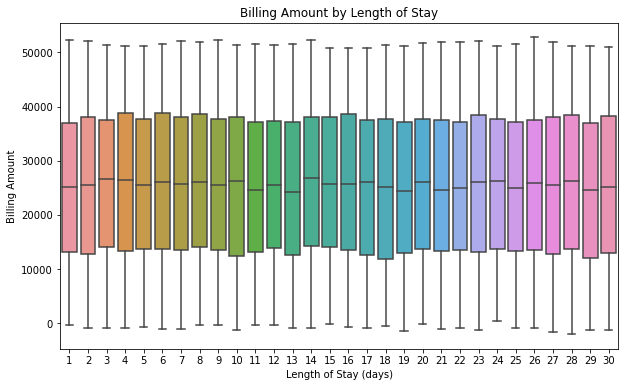

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Length of Stay', y='Billing Amount', data=data)
plt.title('Billing Amount by Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Billing Amount')
plt.show()

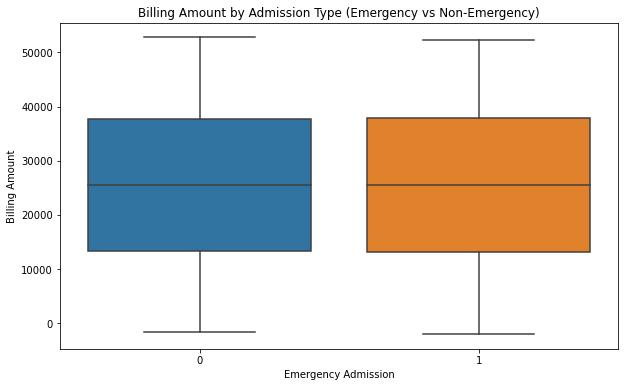

In [16]:
data['Admission Type_Emergency'] = data['Admission Type_Urgent']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type_Emergency', y='Billing Amount', data=data)
plt.title('Billing Amount by Admission Type (Emergency vs Non-Emergency)')
plt.xlabel('Emergency Admission')
plt.ylabel('Billing Amount')
plt.show()

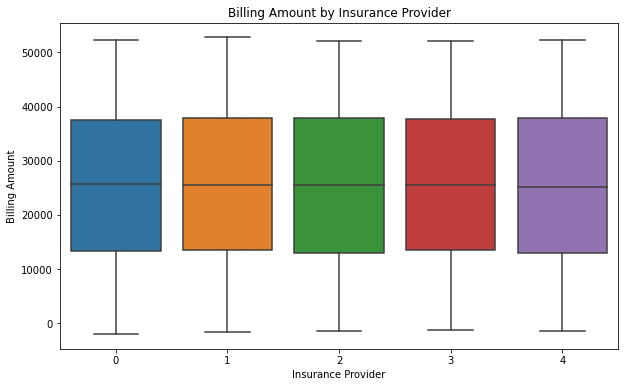

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=data)
plt.title('Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()

1. Length of Stay is the most significant driver of Billing Amount.
2. Emergency admissions here didn't result in higher billing amounts.
3. There are no notable differences in billing amounts based on the insurance provider

# 5. Next Steps


1. Incorporate additional features such as patient comorbidities and surgical procedures.
2. Explore non-linear models like Random Forests or Gradient Boosting Machines.
3. Analyze trends over time to identify seasonal variations and long-term changes.

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
